# Taller 2: Interpolación
Este notebook contiene las soluciones a los ejercicios de interpolación del Taller 2.

## Ejercicio 1: Interpolación de Newton
Cree una función en Python que a partir de un conjunto de n + 1 datos, calcule el polinomio
de interpolación de Newton de grado n. Grafique el polinomio de interpolación junto con los
datos experimentales aportados en el archivo 'Datos Taller 2.txt' en el rango [0, 6].

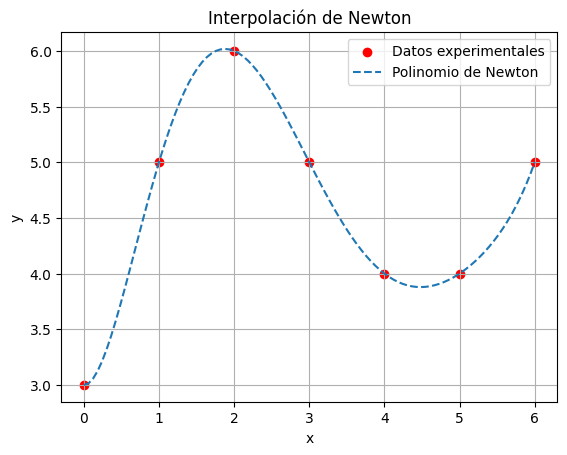

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def diferencias_divididas(x, y):
    """ Calcula la tabla de diferencias divididas de Newton """
    n = len(x)
    coef = np.array(y, dtype=float)
    
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    
    return coef

def polinomio_newton(x_eval, x, coef):
    """ Evalúa el polinomio de Newton en los puntos dados """
    n = len(coef)
    resultado = coef[-1]
    
    for i in range(n - 2, -1, -1):
        resultado = resultado * (x_eval - x[i]) + coef[i]
    
    return resultado

# Cargar los datos del archivo
datos = np.loadtxt("Datos_Taller_2.txt")
x_datos, y_datos = datos[:, 0], datos[:, 1]

# Calcular coeficientes del polinomio de Newton
coeficientes = diferencias_divididas(x_datos, y_datos)

# Evaluar el polinomio en un rango de puntos para graficar
x_graf = np.linspace(0, 6, 100)
y_graf = [polinomio_newton(x, x_datos, coeficientes) for x in x_graf]

# Graficar
plt.scatter(x_datos, y_datos, color='red', label='Datos experimentales')
plt.plot(x_graf, y_graf, label='Polinomio de Newton', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolación de Newton')
plt.show()


## Ejercicio 2: Interpolación de Lagrange
Cree una función en Python que a partir de un conjunto de n + 1 datos, calcule el polinomio
de interpolación de Lagrange de grado n. Grafique el polinomio de interpolación junto con los
datos experimentales aportados en el archivo 'Datos Taller 2.txt' en el rango [0, 6].

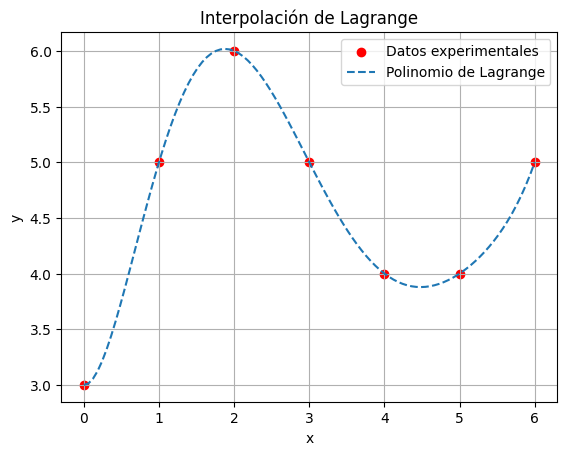

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(x, x_vals, k):
    """ Calcula el k-ésimo polinomio base de Lagrange """
    L_k = 1
    for i in range(len(x_vals)):
        if i != k:
            L_k *= (x - x_vals[i]) / (x_vals[k] - x_vals[i])
    return L_k

def polinomio_lagrange(x_eval, x_vals, y_vals):
    """ Evalúa el polinomio de interpolación de Lagrange """
    resultado = 0
    for k in range(len(x_vals)):
        resultado += y_vals[k] * lagrange_basis(x_eval, x_vals, k)
    return resultado

# Cargar los datos del archivo
datos = np.loadtxt("Datos_Taller_2.txt")
x_datos, y_datos = datos[:, 0], datos[:, 1]

# Evaluar el polinomio en un rango de puntos para graficar
x_graf = np.linspace(0, 6, 100)
y_graf = [polinomio_lagrange(x, x_datos, y_datos) for x in x_graf]

# Graficar
plt.scatter(x_datos, y_datos, color='red', label='Datos experimentales')
plt.plot(x_graf, y_graf, label='Polinomio de Lagrange', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolación de Lagrange')
plt.show()

        



## Ejercicio 3: Interpolación con Splines Cúbicos

Cree una función en Python que a partir de un conjunto de n + 1 datos, calcule el polinomio  de interpolación a través de splines cúbicos. Grafique el polinomio de interpolación junto con los datos experimentales aportados en el archivo "Datos Taller 2.txt" en el rango [0, 6].


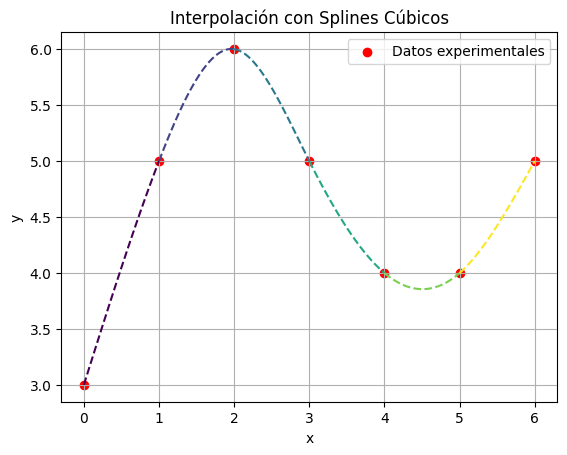

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def tridiagonal_matrix_algorithm(a, b, c, d):
    """ Resuelve el sistema tridiagonal Ax = d """
    n = len(d)
    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)
    x = np.zeros(n)
    
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]
    
    for i in range(1, n-1):
        temp = b[i] - a[i-1] * c_prime[i-1]
        c_prime[i] = c[i] / temp
        d_prime[i] = (d[i] - a[i-1] * d_prime[i-1]) / temp
    
    d_prime[-1] = (d[-1] - a[-1] * d_prime[-2]) / (b[-1] - a[-1] * c_prime[-2])
    x[-1] = d_prime[-1]
    
    for i in range(n-2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i+1]
    
    return x

def splines_cubicos(x_vals, y_vals):
    """ Calcula los coeficientes de los splines cúbicos """
    n = len(x_vals) - 1
    h = np.diff(x_vals)
    alpha = np.zeros(n)
    
    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (y_vals[i+1] - y_vals[i]) - (3 / h[i-1]) * (y_vals[i] - y_vals[i-1])
    
    a = h[:-1]
    b = 2 * (h[:-1] + h[1:])
    c = h[1:]
    d = alpha[1:]
    
    c_vals = np.zeros(n+1)
    c_vals[1:-1] = tridiagonal_matrix_algorithm(a, b, c, d)
    
    b_vals = np.zeros(n)
    d_vals = np.zeros(n)
    
    for i in range(n):
        b_vals[i] = (y_vals[i+1] - y_vals[i]) / h[i] - h[i] * (c_vals[i+1] + 2 * c_vals[i]) / 3
        d_vals[i] = (c_vals[i+1] - c_vals[i]) / (3 * h[i])
    
    return x_vals, y_vals, b_vals, c_vals, d_vals

def evaluar_spline(x, x_vals, y_vals, b_vals, c_vals, d_vals):
    """ Evalúa el spline cúbico en un punto x """
    for i in range(len(x_vals) - 1):
        if x_vals[i] <= x <= x_vals[i+1]:
            dx = x - x_vals[i]
            return y_vals[i] + b_vals[i] * dx + c_vals[i] * dx**2 + d_vals[i] * dx**3
    return None

# Cargar los datos del archivo
datos = np.loadtxt("Datos_Taller_2.txt")
x_datos, y_datos = datos[:, 0], datos[:, 1]

# Calcular coeficientes de los splines cúbicos
x_vals, y_vals, b_vals, c_vals, d_vals = splines_cubicos(x_datos, y_datos)

# Graficar cada tramo de spline con un color distinto
colors = plt.cm.viridis(np.linspace(0, 1, len(x_vals) - 1))
plt.scatter(x_datos, y_datos, color='red', label='Datos experimentales')

for i in range(len(x_vals) - 1):
    x_graf = np.linspace(x_vals[i], x_vals[i+1], 50)
    y_graf = [evaluar_spline(x, x_vals, y_vals, b_vals, c_vals, d_vals) for x in x_graf]
    plt.plot(x_graf, y_graf, color=colors[i], linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolación con Splines Cúbicos')
plt.show()


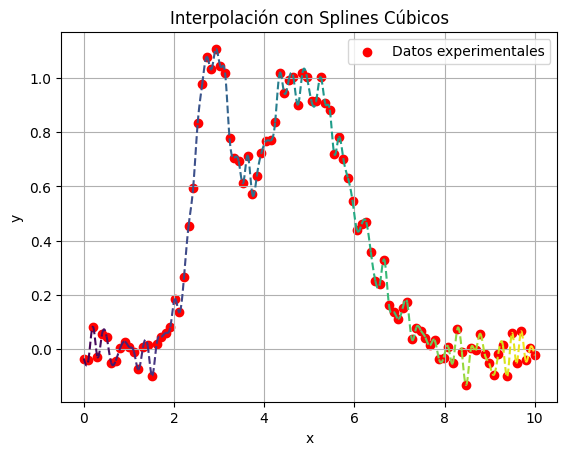

In [26]:
# Cargar los datos del archivo
datos1 = np.loadtxt("Datos_Taller_2_B.txt")
x_datos, y_datos = datos1[:, 0], datos1[:, 1]

# Calcular coeficientes de los splines cúbicos
x_vals, y_vals, b_vals, c_vals, d_vals = splines_cubicos(x_datos, y_datos)

# Graficar cada tramo de spline con un color distinto
colors = plt.cm.viridis(np.linspace(0, 1, len(x_vals) - 1))
plt.scatter(x_datos, y_datos, color='red', label='Datos experimentales')

for i in range(len(x_vals) - 1):
    x_graf = np.linspace(x_vals[i], x_vals[i+1], 50)
    y_graf = [evaluar_spline(x, x_vals, y_vals, b_vals, c_vals, d_vals) for x in x_graf]
    plt.plot(x_graf, y_graf, color=colors[i], linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('Interpolación con Splines Cúbicos')
plt.show()